In [1]:
import cv2
import tensorflow as tf
#from skimage.exposure import rescale_intensity 
#from skimage.segmentation import slic
#from skimage.util import img_as_float
#from skimage import io 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from PIL import Image
import os
import pandas
import skimage

In [3]:
#(x1, y1)(left, top)
#(x2, y2)(right, bottom)
#(top, right, bottom, left)
#(32, 42, 0, 0)
mypath = "/home/ket/maryam/imgaug/cars/"
#debugging
dirs = os.listdir(mypath)
num_images = len(dirs)
print (num_images)
images_original = []
images_flip = []
images_rot = []
images_rot_flip = []
for filename in os.listdir(mypath):
    img = cv2.imread(os.path.join(mypath, filename))
   # print(img)
    if img is not None:
        flip = np.fliplr(img)
        rot = skimage.transform.rotate(img, angle=15, mode='reflect')
        
        rot_flip = np.fliplr(rot)
       
        images_flip.append(flip)
        images_original.append(img)
        images_rot.append(rot)
        images_rot_flip.append(rot_flip)
        
        file_name_flip = os.path.join("/home/ket/maryam/imgaug/flipped_cars/", 'flipped_'+filename)
        cv2.imwrite(file_name_flip, flip)
        
        file_name_rot = os.path.join("/home/ket/maryam/imgaug/rotated_cars/", 'rotated_'+filename)
        mpimg.imsave(file_name_rot, rot)
        
        file_name_rot_flip = os.path.join("/home/ket/maryam/imgaug/rotated_and_flipped_cars/", 'rotated_and_flipped'+filename)
        mpimg.imsave(file_name_rot_flip, rot_flip)
        
        
        
#for file in dirs:
    #print(file)
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
##images = np.empty (len(onlyfiles))
#for n in range (num_images):
#    image = cv2.imread('*.JPG')
#    print(image)
#Folder_name = "augmented_image"
#Extension = ".JPG"

# RESIZE
# def resize_image(image, w, h):
#     image=cv2.resize(image(w, h))
#     cv2.imwrite(Folder_name+"/Resize-"+str(w)"+"str(h)+Extension, image)


240


240


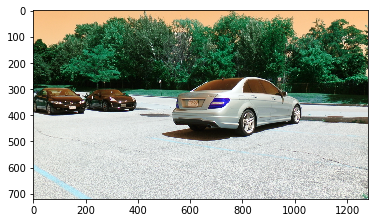

In [3]:
n = len(images_original)
print(n)
plt.imshow(images_original[45])

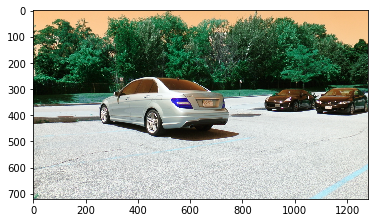

True

In [4]:
image = images_original[45]
flip_1 = np.fliplr(image)
plt.imshow (flip_1)
plt.show()
mpimg.imsave("test-save.png", flip_1)
cv2.imwrite("test-save2.jpg", flip_1)



True

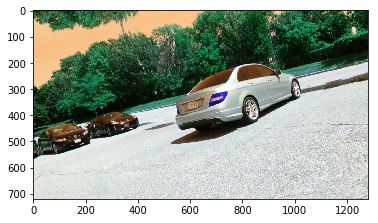

In [5]:
image = images_original[45]

rot = skimage.transform.rotate(image, angle=15, mode='reflect')
plt.imshow(rot)
mpimg.imsave("test-save.jpg", rot)
cv2.imwrite("test-save2.jpg", rot)

In [18]:
image = images_original[45]

imshape = image.shape
batch = 1
height = imshape[0]
width = imshape[1]
channels = 3

pad_top = 10
pad_left = 10
pad_bottom = 10
pad_right = 20

shape = [batch, height, width, channels]
x = tf.placeholder(dtype = tf.float32, shape = shape)

        # We use two functions to get our desired augmentation
x = tf.image.pad_to_bounding_box(x, pad_top, pad_left, height + pad_bottom + pad_top, width + pad_right + pad_left)
output = tf.image.crop_to_bounding_box(x, pad_bottom, pad_right, height, width)
output = tf.cast(output, tf.uint16)
output = tf.squeeze(output, axis=[0])

output_image = tf.image.encode_png(output)
output_image = tf.cast(output_image, tf.float32)

print(outpute)

cv2.imwrite('imagejpg',output_image)

Tensor("Cast_6:0", shape=(), dtype=float32)


TypeError: img is not a numpy array, neither a scalar